# 네이버 쇼핑 TV 가격 예측 모델 학습
- https://wikidocs.net/39710

In [ ]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# 데이터 로드
train_df = pd.read_excel('https://github.com/cranberryai/todak_todak_python/blob/master/machine_learning/regression/%E1%84%82%E1%85%A6%E1%84%8B%E1%85%B5%E1%84%87%E1%85%A5TV%E1%84%80%E1%85%A1%E1%84%80%E1%85%A7%E1%86%A8_%E1%84%8E%E1%85%AC%E1%84%8C%E1%85%A9%E1%86%BC.xlsx?raw=true', sheet_name='train')
test_df = pd.read_excel('https://github.com/cranberryai/todak_todak_python/blob/master/machine_learning/regression/%E1%84%82%E1%85%A6%E1%84%8B%E1%85%B5%E1%84%87%E1%85%A5TV%E1%84%80%E1%85%A1%E1%84%80%E1%85%A7%E1%86%A8_%E1%84%8E%E1%85%AC%E1%84%8C%E1%85%A9%E1%86%BC.xlsx?raw=true', sheet_name='test')

- 데이터 전처리

In [ ]:
train_df.isna().sum() # 반드시 확인(필수)

ID      0
판매가     0
화면크기    0
형태      0
해상도     0
화면비율    0
LCD     0
LED     0
OLED    0
QLED    0
단자      0
부가기능    0
dtype: int64

In [ ]:
train_df.info() # 자료형, null값 유무 확인

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7000 entries, 0 to 6999
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   ID      7000 non-null   int64
 1   판매가     7000 non-null   int64
 2   화면크기    7000 non-null   int64
 3   형태      7000 non-null   int64
 4   해상도     7000 non-null   int64
 5   화면비율    7000 non-null   int64
 6   LCD     7000 non-null   int64
 7   LED     7000 non-null   int64
 8   OLED    7000 non-null   int64
 9   QLED    7000 non-null   int64
 10  단자      7000 non-null   int64
 11  부가기능    7000 non-null   int64
dtypes: int64(12)
memory usage: 656.4 KB


In [ ]:
train_df.describe() # 값이 0인 변수들이 있음

,ID,판매가,화면크기,형태,해상도,화면비율,LCD,LED,OLED,QLED,단자,부가기능
count,7000.000000,7.000000e+03,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000
mean,10310.438857,1.686936e+06,53.471000,0.086714,1799.794286,0.523857,0.002571,0.820714,0.031286,0.093429,2.835143,3.120857
std,6000.106692,1.751524e+06,12.147814,0.281436,559.870133,0.499466,0.050648,0.383619,0.174101,0.291053,1.094072,2.040375
min,8.000000,1.700000e+04,15.000000,0.000000,720.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5102.750000,6.086625e+05,43.000000,0.000000,1080.000000,0.000000,0.000000,1.000000,0.000000,0.000000,2.000000,2.000000
50%,10211.000000,1.159185e+06,55.000000,0.000000,2160.000000,1.000000,0.000000,1.000000,0.000000,0.000000,2.000000,3.000000
75%,15517.000000,2.147532e+06,65.000000,0.000000,2160.000000,1.000000,0.000000,1.000000,0.000000,0.000000,4.000000,5.000000
max,20676.000000,2.940000e+07,80.000000,1.000000,2160.000000,1.000000,1.000000,1.000000,1.000000,1.000000,6.000000,8.000000


In [ ]:
# LCD, LED, OLED, QLED는 일종의 더미변수
train_df[(train_df['LCD']==0)]

,ID,판매가,화면크기,형태,해상도,화면비율,LCD,LED,OLED,QLED,단자,부가기능
0,8,396240,55,0,2160,1,0,1,0,0,3,1
1,9,412870,55,0,2160,1,0,1,0,0,3,1
2,10,414590,55,0,2160,1,0,1,0,0,3,1
3,14,418000,55,0,2160,1,0,1,0,0,3,1
4,15,419000,55,0,2160,1,0,1,0,0,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...
6995,20670,1271670,49,0,1080,1,0,1,0,0,2,6
6996,20672,1441670,49,0,1080,1,0,1,0,0,2,6
6997,20673,1441680,49,0,1080,1,0,1,0,0,2,6
6998,20675,1571400,49,0,1080,1,0,1,0,0,2,6


In [ ]:
# LCD, LED, OLED, QLED의 정보가 없는(모든 값이 0) 자료들을 제거해야 함
train_df[(train_df['LCD']==0) & (train_df['LED']==0) & (train_df['OLED']==0) & (train_df['QLED']==0)]
print((len(train_df[(train_df['LCD']==0) & (train_df['LED']==0) & (train_df['OLED']==0) & (train_df['QLED']==0)]))/len(train_df)*100)
print((len(test_df[(test_df['LCD']==0) & (test_df['LED']==0) & (test_df['OLED']==0) & (test_df['QLED']==0)]))/len(test_df)*100)

5.2
6.133333333333333


In [ ]:
# 더미변수 모든 값이 0인 자료들 제거
search_df = train_df[(train_df['LCD']==0) & (train_df['LED']==0) & (train_df['OLED']==0) & (train_df['QLED']==0)]
train_df = train_df.drop(search_df.index, axis=0)
search_df = test_df[(test_df['LCD']==0) & (test_df['LED']==0) & (test_df['OLED']==0) & (test_df['QLED']==0)]
test_df = test_df.drop(search_df.index, axis=0)

In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6636 entries, 0 to 6999
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   ID      6636 non-null   int64
 1   판매가     6636 non-null   int64
 2   화면크기    6636 non-null   int64
 3   형태      6636 non-null   int64
 4   해상도     6636 non-null   int64
 5   화면비율    6636 non-null   int64
 6   LCD     6636 non-null   int64
 7   LED     6636 non-null   int64
 8   OLED    6636 non-null   int64
 9   QLED    6636 non-null   int64
 10  단자      6636 non-null   int64
 11  부가기능    6636 non-null   int64
dtypes: int64(12)
memory usage: 674.0 KB


In [ ]:
train_df.describe()

,ID,판매가,화면크기,형태,해상도,화면비율,LCD,LED,OLED,QLED,단자,부가기능
count,6636.000000,6.636000e+03,6636.000000,6636.000000,6636.000000,6636.000000,6636.000000,6636.000000,6636.000000,6636.000000,6636.000000,6636.000000
mean,10245.510699,1.649448e+06,53.151296,0.091471,1780.524412,0.523207,0.002712,0.865732,0.033002,0.098553,2.876130,3.137131
std,6004.202821,1.712329e+06,12.104532,0.288299,568.318422,0.499499,0.052015,0.340965,0.178655,0.298084,1.102862,2.054906
min,8.000000,1.700000e+04,15.000000,0.000000,720.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4987.500000,5.913075e+05,43.000000,0.000000,1080.000000,0.000000,0.000000,1.000000,0.000000,0.000000,2.000000,2.000000
50%,10118.500000,1.132270e+06,55.000000,0.000000,2160.000000,1.000000,0.000000,1.000000,0.000000,0.000000,2.000000,3.000000
75%,15446.500000,2.157762e+06,65.000000,0.000000,2160.000000,1.000000,0.000000,1.000000,0.000000,0.000000,4.000000,5.000000
max,20676.000000,2.940000e+07,80.000000,1.000000,2160.000000,1.000000,1.000000,1.000000,1.000000,1.000000,6.000000,8.000000


In [ ]:
# 해상도의 50sms 2160 값을 갖음!
# 편차가 큰 변수(해상도)에서 적은 범위에 해당하는 데이터 구간을 제거할지 말지 고려해야 함.
len(train_df[train_df['해상도']<900])

731

In [ ]:
train_df.corr()

,ID,판매가,화면크기,형태,해상도,화면비율,LCD,LED,OLED,QLED,단자,부가기능
ID,1.000000,0.209871,0.059389,0.114880,-0.029099,0.120977,0.025500,-0.111327,0.122795,0.049296,0.002121,0.244514
판매가,0.209871,1.000000,0.634457,0.052178,0.370425,-0.150205,-0.008157,-0.487213,0.239198,0.415364,-0.214304,0.371879
화면크기,0.059389,0.634457,1.000000,0.111088,0.686708,-0.078878,0.007966,-0.263554,0.094148,0.243651,-0.156203,0.387837
형태,0.114880,0.052178,0.111088,1.000000,0.135387,-0.045618,-0.016548,-0.023764,-0.032282,0.049418,-0.067695,0.139098
해상도,-0.029099,0.370425,0.686708,0.135387,1.000000,-0.112418,-0.064289,-0.228817,0.087024,0.220796,-0.276793,0.347716
화면비율,0.120977,-0.150205,-0.078878,-0.045618,-0.112418,1.000000,-0.054632,0.184225,-0.024628,-0.186433,0.298510,0.309073
LCD,0.025500,-0.008157,0.007966,-0.016548,-0.064289,-0.054632,1.000000,-0.132428,-0.009634,-0.017244,0.053150,-0.079624
LED,-0.111327,-0.487213,-0.263554,-0.023764,-0.228817,0.184225,-0.132428,1.000000,-0.469097,-0.839599,0.277607,-0.152042
OLED,0.122795,0.239198,0.094148,-0.032282,0.087024,-0.024628,-0.009634,-0.469097,1.000000,-0.061083,-0.103933,0.072242
QLED,0.049296,0.415364,0.243651,0.049418,0.220796,-0.186433,-0.017244,-0.839599,-0.061083,1.000000,-0.264525,0.144511


- 추가적으로 데이터 전처리를 할 때 해야할 것
    - y값 판매가와의 각 x 변수들끼리의 연관도(corr)
    - . 이상치 확인해서 제거
    - 다중공성선 확인(VIF(분산팽창인자), x값들끼리의 연관도가 높으면 그 중 하나의 변수는 제거)
    - 데이터 스케일링(데이터값을 일정한 범위로 맞춤, 정규화)

In [ ]:
x_train = train_df.drop(['ID', '판매가'], axis=1) # ID는 x변수에 해당되지 않음. 판매가는 Y값으로 할 것임.
x_test = test_df.drop(['ID', '판매가'], axis=1)
y_train = train_df['판매가']
y_test = test_df['판매가']

In [ ]:
# x값과 y값의 행의 개수가 무조건 맞아야 함!
# train값과 test값은 열 개수가 무조건 맞아야 함!

print(x_train.shape, y_train.shape) 
print(x_test.shape, y_test.shape) 

# x의 shape (6636,10)는 모델식에 입력되는 10개의 x변수가 있음.
# 딥러닝에서는 입력 x의 개수를 사용자가 직접 설정해야하는데 컴퓨터가 계산하는 shape과 다르면 에러나옴!
# 10을 입력하거나 x_train.shape[1] 입력
x_train.shape[1]

(6636, 10) (6636,)
(2816, 10) (2816,)


10

In [ ]:
type(x_train)

pandas.core.frame.DataFrame

In [ ]:
# 머신러닝, 딥러닝에서는 array만 처리함
x_train = x_train.values # x_train.to_numpy()와 동일
x_test = x_test.values # x_train.to_numpy()와 동일

## 모델 피팅, 실행
- [과대적합] 트레이닝 자료에서는 $R^2$ 스코어가 좋은데 테스트 자료에서는 나쁘게 나올 때
- [과소적합] 트레이닝, 테스트 모두 스코어가 별로일 때

- 릿지, 라쏘는 다중회귀분석에서 사용
- 릿지, 라쏘, 회귀분석의 스코어(결정계수 등)가 같을 때는 처리 속도가 빠른 모형을 선택함.

### 1. 선형회귀
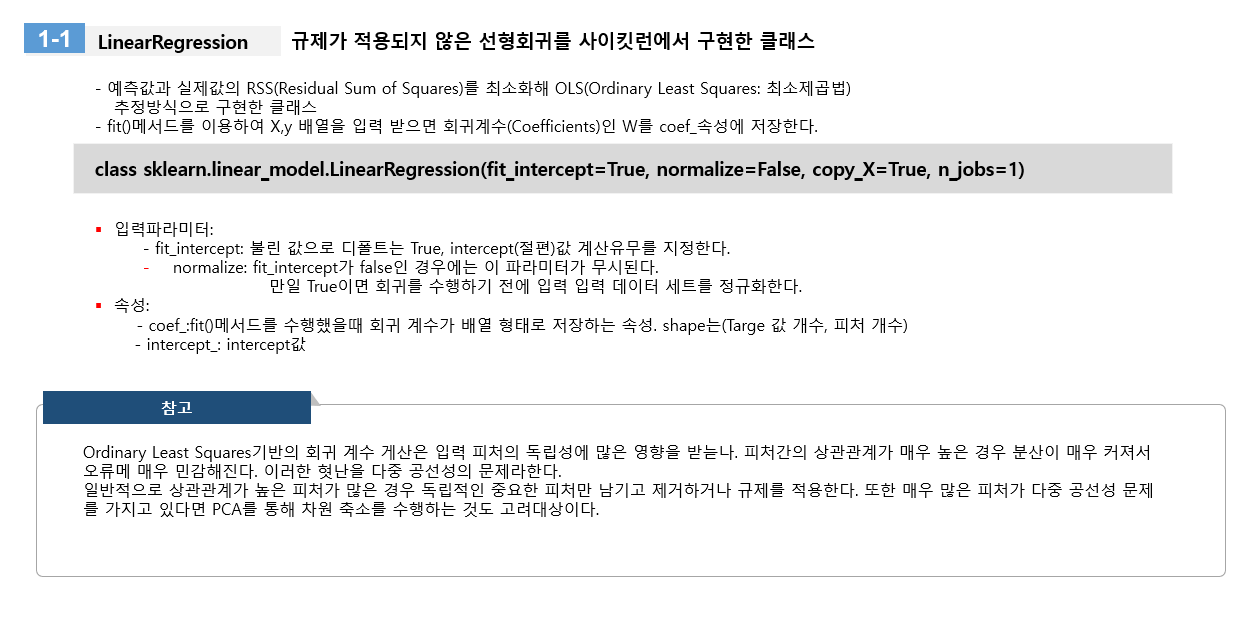

In [ ]:
# 선형회귀
from sklearn.linear_model import LinearRegression
model_lr = LinearRegression()
model_lr.fit(x_train,y_train)
print(model_lr.score(x_train,y_train),model_lr.score(x_test,y_test))

0.5676150643429947 0.5365762057290643


In [ ]:
# 선형회귀식에서 사용된 변수들의 검증(OLS), p-value등을 확인해야 함

- 선형회귀 k교차검증(k-fold)
    - 적은 자료를 가지고 데이터분석을 실행할때 k개만큼 자료를 교차해서 검증
    - train data와 test data의 수는 일정해야 함.

In [ ]:
# k교차검증
# (데이터 개수가 작을 때 트레이닝하고 테스트하고 경우의 수를 다르게 함)
# https://wikidocs.net/84810

from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
model_lr = LinearRegression()
scores = cross_val_score(model_lr, x_train, y_train, cv=10) # 보통 cv는 10개 
scores

array([0.13306668, 0.51831341, 0.50581865, 0.65995459, 0.53651824,
       0.5958442 , 0.3800345 , 0.65394724, 0.47312693, 0.54982533])

- 사이킷런의 회귀평가지표
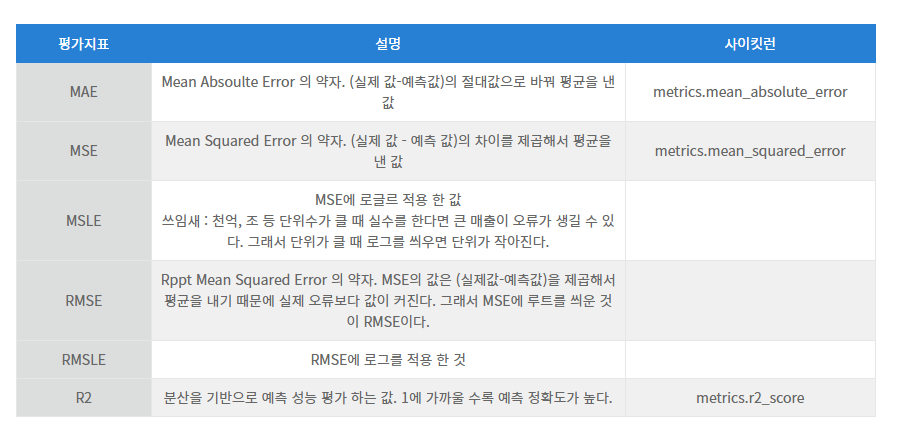

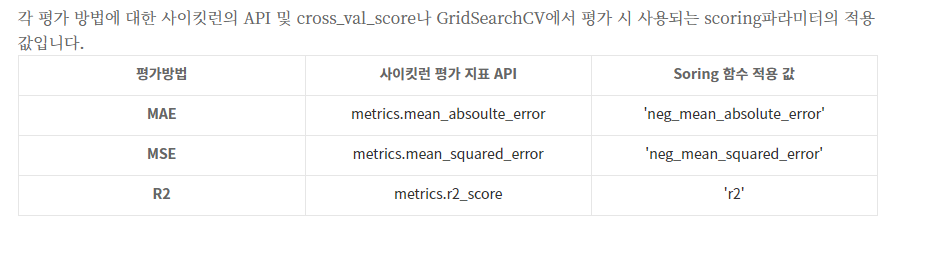

### 2. 라쏘모델

In [ ]:
# 라쏘모델(l1, 여러개의 x변수 중에 영향력이 작은(회귀계수값이 작은) 변수는 취급하지 않겠다.)
# 라쏘와 리지모델에서 alpha값은 규제 정도를 나타냄. alpha값을 높이면 규제를 강하게 함.
from sklearn.linear_model import Lasso

alphaList = [0.1, 1, 10, 100] # 알바 리스트

for alphaValue in alphaList:
    model_lasso = Lasso(alpha=alphaValue)
    model_lasso.fit(x_train,y_train)
    print(model_lasso.score(x_train,y_train),model_lasso.score(x_test,y_test))

0.5676150643415927 0.5365762014209384
0.567615064202802 0.536576162556117
0.5676150493638871 0.5365790774348259
0.5676135662093205 0.5366039678040928


### 3. 릿지 모델

In [ ]:
# 리지 모델(l2, 여러개의 x변수 중에 영향력이 너무 큰 (회귀계수가 큰 값) 변수의 영향력을 감소시킴)
from sklearn.linear_model import Ridge

alphaList = [0.1, 1, 10, 100] 

for alphaValue in alphaList:
    model_ridge = Ridge(alpha=alphaValue)
    model_ridge.fit(x_train,y_train)
    print(model_ridge.score(x_train,y_train),model_ridge.score(x_test,y_test))

0.567615033175222 0.5365780534201788
0.5676121660464679 0.5365924719385908
0.5674552229723533 0.5366175807534527
0.565565632320681 0.5359588359730016


- (참고) 사이킷런 데이터 셋
- https://teddylee777.github.io/scikit-learn/Sklearn-dataset-%EB%AA%A8%EB%93%88%EC%9D%84-%ED%99%9C%EC%9A%A9%ED%95%98%EC%97%AC-dataset%EB%A1%9C%EB%94%A9%ED%95%98%EA%B8%B0

In [ ]:
from sklearn.datasets import load_boston
from sklearn.model_selection import GridSearchCV

boston = load_boston()
X = boston.data
y = boston.target

ridge = Ridge()
alphas = [0, 1, 10]

parameters = {'alpha' : alphas}
ridge_reg = GridSearchCV(ridge, parameters, scoring='neg_mean_squared_error', cv=5)
ridge_reg.fit(X, y)
print(ridge_reg.best_params_)
print(ridge_reg.best_score_) # -붙여서 생각하기!

{'alpha': 10}
-33.395224459036605


- train_test_split()는 간편하게 전체 데이터를 학습/테스트(또는 검증)용 데이터 세트로 분리하는 데 사용

- cross_val_score()는 간편하게 교차검증 결과 평가 지표(정확도, 정밀도등)를 반환

- GridSearchCV는 교차 검증을 통해 최적 하이퍼 파라미터를 찾아주는 역할